# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st

# Study data files
mouse_metadata_path = Path(r"C:\Users\aajanaku\OneDrive - Above the Treeline, Inc\Desktop\Resources", "mouse_metadata.csv")
study_results_path = Path(r"C:\Users\aajanaku\OneDrive - Above the Treeline, Inc\Desktop\Resources", "study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.
mouse_count = mouse_study_complete['Mouse ID'].nunique()
print("Mouse ID:", mouse_count)

Mouse ID: 249


In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateRows

array(['g989'], dtype=object)

In [49]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [50]:
# Optional: Get all the data for the duplicate mouse ID. 


In [51]:
duplicate=mouse_study_complete.loc[mouse_study_complete["Mouse ID"]== "g989"]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete[mouse_study_complete['Mouse ID'].isin(duplicate)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group by `drug_name` and calculate statistics for each column
volume_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
volume_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
volume_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
volume_standard = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
volume_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Combine each of the drugs above into single DataFrame 
data = {
    'Mean Tumor Volume': volume_mean,
    'Median Tumor Volume': volume_median,
    'Tumor Volume Variance': volume_variance,
    'Tumor Volume Std. Dev.': volume_standard,
    'Tumor Volume Std. Err.': volume_sem,
}
summary_statistics = pd.DataFrame(data)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Do I need tumor volume heading?
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
adv_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

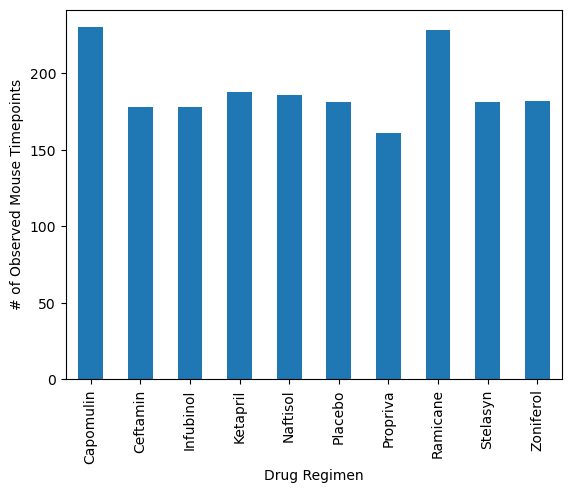

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sum_timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
sum_timepoints.plot.bar(x="Drug Regimen", y=sum_timepoints, rot=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

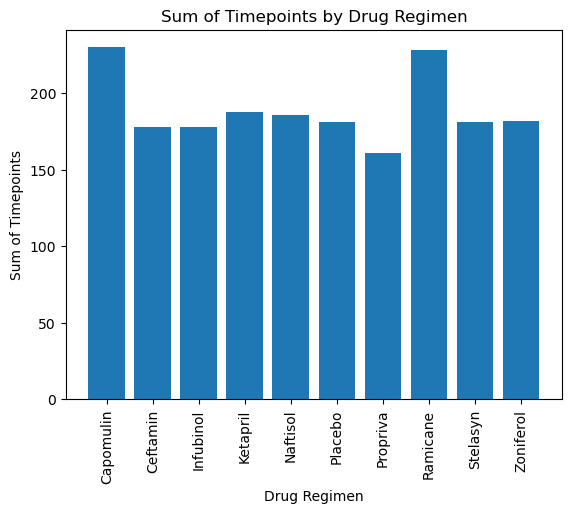

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
sum_timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()

plt.bar(sum_timepoints.index, sum_timepoints)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Sum of Timepoints")
plt.title("Sum of Timepoints by Drug Regimen")
plt.show()


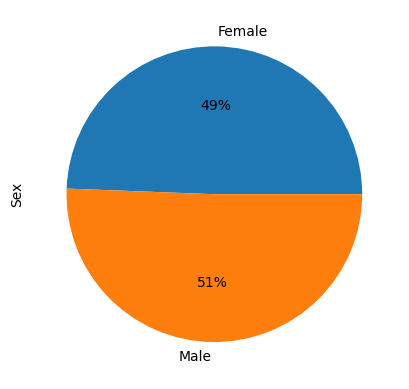

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Matplot lib.
sex_counts=clean_df.groupby('Sex')['Sex'].count()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()

<Axes: ylabel='Sex'>

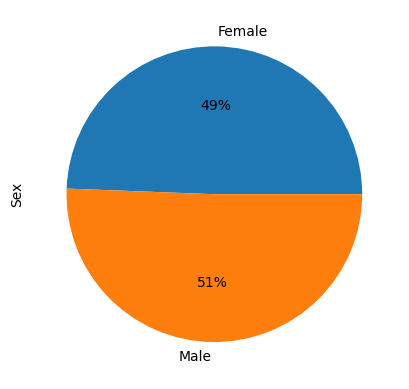

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts.plot(kind='pie',autopct='%1.0f%%')

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoints = max_timepoints.reset_index()
max_timepoints


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedf=max_timepoints.merge(clean_df,on=['Mouse ID', 'Timepoint'],how='left')
mergedf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_List=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drug_List:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume=mergedf.loc[mergedf['Drug Regimen']==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq



    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=tumor_volume.loc[(tumor_volume>upper_bound)|(tumor_volume<lower_bound)]
    print(f'{drug} outliers: {outliers}')

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


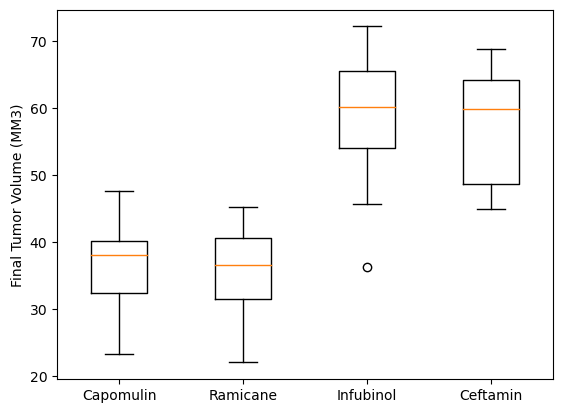

In [111]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. Add y axis
plt.boxplot(tumor_volume_list,labels=Drug_List)
plt.ylabel("Final Tumor Volume (MM3)")
plt.show()

## Line and Scatter Plots

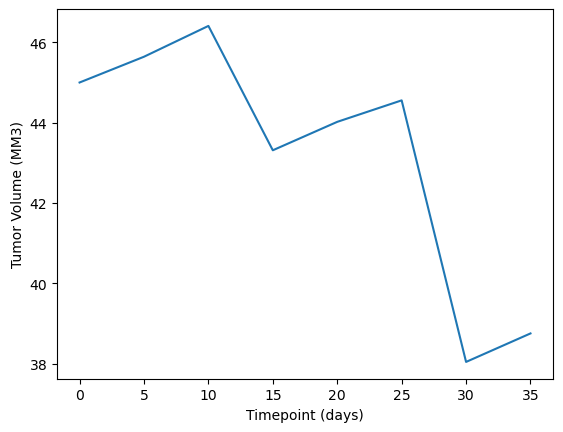

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data=clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
mouse_data=cap_data.loc[cap_data['Mouse ID']=='j246']
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.savefig('scatter.png')
plt.ylabel("Tumor Volume (MM3)")
plt.xlabel("Timepoint (days)")
plt.show()

In [134]:
cap_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


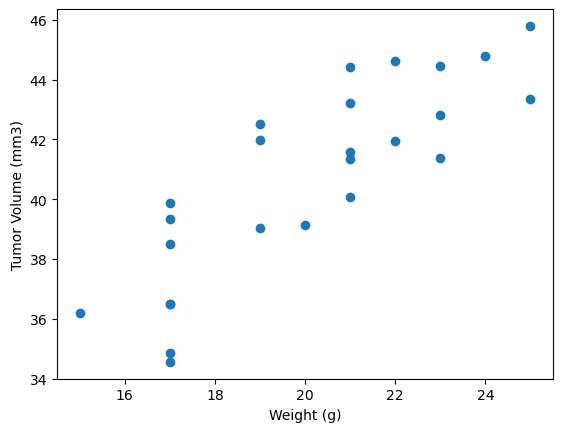

In [164]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_data_groupby=cap_data.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(cap_data_groupby["Weight (g)"],cap_data_groupby["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation coefficient between weight and tumor volume for the entire Capomulin regimen is 0.84


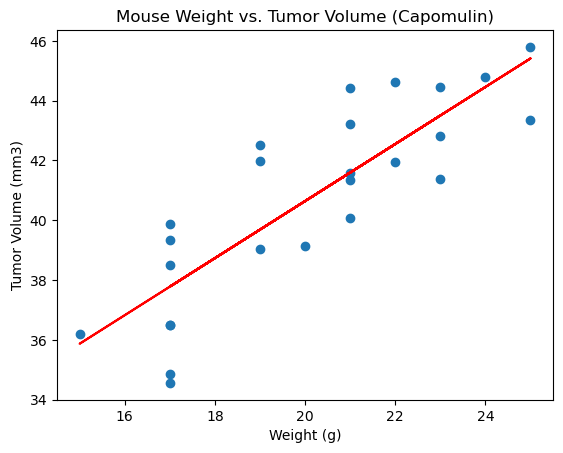

In [173]:
correlation_coefficient = st.pearsonr(cap_data_groupby["Weight (g)"], cap_data_groupby["Tumor Volume (mm3)"])[0]

print(f"The correlation coefficient between weight and tumor volume for the entire Capomulin regimen is {round(correlation_coefficient, 2)}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(cap_data_groupby["Weight (g)"], cap_data_groupby["Tumor Volume (mm3)"])

# Create a scatter plot
plt.scatter(cap_data_groupby["Weight (g)"], cap_data_groupby["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Tumor Volume (Capomulin)")

# Plot the linear regression line
x = cap_data_groupby["Weight (g)"]
y = cap_data_groupby["Tumor Volume (mm3)"]
plt.plot(x, intercept + slope * x, color='red')

# Display the plot
plt.show()

